In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Task DATA/output_dataset.csv',)

In [ ]:
df.head()


,Unnamed: 0,household_id,total_income,union_name,user_id,profile_name,father_name,mother_name,birthday,age,...,RESULT_STAT_BMI,SUGAR,TAG_NAME,RESULT_STAT_SUGAR,PULSE_RATE,RESULT_STAT_PR,SPO2,RESULT_STAT_SPO2,MUAC,RESULT_STAT_MUAC
0,1,241175,Lower class,KOLA,988794,মো: সাগরহোসেন,0.0,0.0,2001-11-05 18:00:00,19,...,NaN,NaN,NaN,NaN,96.0,Normal,97.0,Normal,NaN,NaN
1,2,241176,Lower class,KOLA,988796,মোছা:তামান্না,0.0,0.0,2000-06-18 18:00:00,20,...,NaN,NaN,NaN,NaN,89.0,Normal,NaN,NaN,NaN,NaN
2,3,241179,Lower class,KOLA,988802,শুকুরুচন্দ্র,0.0,0.0,1978-06-04 18:00:00,42,...,NaN,NaN,NaN,NaN,69.0,Normal,NaN,NaN,NaN,NaN
3,4,241180,Lower class,KOLA,988807,দিপালীরাণী,0.0,0.0,1956-02-02 18:00:00,64,...,NaN,8.72,Random,Normal,85.0,Normal,NaN,NaN,NaN,NaN
4,5,241181,Lower class,KOLA,988809,বুলবুলি,0.0,0.0,1996-12-25 18:00:00,23,...,NaN,NaN,NaN,NaN,101.0,High,NaN,NaN,NaN,NaN


In [ ]:
#columns_to_drop = ['profile_name','father_name','mother_name','RESULT_STAT_MUAC', 'MUAC','RESULT_STAT_BMI','HEIGHT','WEIGHT','BMI','RESULT_STAT_SUGAR']
df.drop(['profile_name','father_name','mother_name','birthday','RESULT_STAT_MUAC', 'MUAC','RESULT_STAT_BMI','HEIGHT','WEIGHT','BMI','RESULT_STAT_SUGAR'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'household_id', 'total_income', 'union_name', 'user_id',
       'age', 'gender', 'is_poor', 'is_freedom_fighter', 'had_stroke',
       'has_cardiovascular_disease', 'disabilities_name', 'diabetic',
       'profile_hypertensive', 'SYSTOLIC', 'DIASTOLIC', 'RESULT_STAT_BP',
       'SUGAR', 'TAG_NAME', 'PULSE_RATE', 'RESULT_STAT_PR', 'SPO2',
       'RESULT_STAT_SPO2'],
      dtype='object')

In [ ]:
df.drop(df.columns[0],axis=1,inplace=True)

In [ ]:
df.columns

Index(['household_id', 'total_income', 'union_name', 'user_id', 'age',
       'gender', 'is_poor', 'is_freedom_fighter', 'had_stroke',
       'has_cardiovascular_disease', 'disabilities_name', 'diabetic',
       'profile_hypertensive', 'SYSTOLIC', 'DIASTOLIC', 'RESULT_STAT_BP',
       'SUGAR', 'TAG_NAME', 'PULSE_RATE', 'RESULT_STAT_PR', 'SPO2',
       'RESULT_STAT_SPO2'],
      dtype='object')

In [ ]:
df.RESULT_STAT_BP.unique()

array(['Prehypertension', 'Mild High', 'Normal', 'Moderate High', 'High',
       'Severe High', 'Low', nan], dtype=object)

In [ ]:
df.shape

(29999, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   household_id                29999 non-null  int64  
 1   total_income                29999 non-null  object 
 2   union_name                  29999 non-null  object 
 3   user_id                     29999 non-null  int64  
 4   age                         29999 non-null  int64  
 5   gender                      29999 non-null  object 
 6   is_poor                     29999 non-null  int64  
 7   is_freedom_fighter          29999 non-null  int64  
 8   had_stroke                  29999 non-null  int64  
 9   has_cardiovascular_disease  29999 non-null  int64  
 10  disabilities_name           29999 non-null  object 
 11  diabetic                    29999 non-null  bool   
 12  profile_hypertensive        29999 non-null  bool   
 13  SYSTOLIC                    276

In [ ]:
df.describe()

,household_id,user_id,age,is_poor,is_freedom_fighter,had_stroke,has_cardiovascular_disease,SYSTOLIC,DIASTOLIC,SUGAR,PULSE_RATE,SPO2
count,29999.000000,2.999900e+04,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,27600.000000,27600.000000,1583.000000,27455.000000,4345.000000
mean,220657.302510,9.784833e+05,38.637621,0.0,0.000200,0.000767,0.001133,122.163623,76.133949,9.990543,83.635913,97.627657
std,158927.210137,8.081330e+05,17.494271,0.0,0.014141,0.027679,0.033647,20.863131,12.277434,5.242119,12.678662,4.026527
min,12300.000000,9.680400e+04,0.000000,0.0,0.000000,0.000000,0.000000,52.000000,30.000000,0.110000,1.000000,5.000000
25%,81244.500000,3.516110e+05,26.000000,0.0,0.000000,0.000000,0.000000,107.000000,68.000000,6.410000,75.000000,98.000000
50%,219654.000000,9.050990e+05,37.000000,0.0,0.000000,0.000000,0.000000,120.000000,75.000000,8.120000,83.000000,99.000000
75%,279809.500000,1.122635e+06,50.000000,0.0,0.000000,0.000000,0.000000,132.000000,83.000000,11.960000,92.000000,99.000000
max,786118.000000,4.040559e+06,120.000000,0.0,1.000000,1.000000,1.000000,227.000000,144.000000,35.000000,206.000000,100.000000


In [ ]:
df.isnull().sum()

household_id                      0
total_income                      0
union_name                        0
user_id                           0
age                               0
gender                            0
is_poor                           0
is_freedom_fighter                0
had_stroke                        0
has_cardiovascular_disease        0
disabilities_name                 0
diabetic                          0
profile_hypertensive              0
SYSTOLIC                       2399
DIASTOLIC                      2399
RESULT_STAT_BP                 2399
SUGAR                         28416
TAG_NAME                      28416
PULSE_RATE                     2544
RESULT_STAT_PR                 2544
SPO2                          25654
RESULT_STAT_SPO2              25654
dtype: int64

In [ ]:
df.drop(['SUGAR','TAG_NAME','SPO2','RESULT_STAT_SPO2'] ,axis=1,inplace=True )

Finding Null Values.

In [ ]:
df.isnull().sum()

household_id                     0
total_income                     0
union_name                       0
user_id                          0
age                              0
gender                           0
is_poor                          0
is_freedom_fighter               0
had_stroke                       0
has_cardiovascular_disease       0
disabilities_name                0
diabetic                         0
profile_hypertensive             0
SYSTOLIC                      2399
DIASTOLIC                     2399
RESULT_STAT_BP                2399
PULSE_RATE                    2544
RESULT_STAT_PR                2544
dtype: int64

In [ ]:
mask1=df['RESULT_STAT_BP'].isnull()
mask2=df['RESULT_STAT_PR'].isnull()
common_missing=mask1 & mask2
total_common_missing=common_missing.sum()
if common_missing.any():
  print("Common missing values exist in both columns.")
  common_missing_indices = common_missing[common_missing].index
  print("Total Common missing values exist in both columns.",total_common_missing)
  print("Indices with Common missing values:", common_missing_indices)
else:
   print("No Common missing values:")



Common missing values exist in both columns.
Total Common missing values exist in both columns. 2348
Indices with Common missing values: Int64Index([  230,   361,   364,   365,   516,   618,   642,   647,   680,
              702,
            ...
            29664, 29702, 29793, 29826, 29840, 29899, 29944, 29959, 29965,
            29997],
           dtype='int64', length=2348)


In [ ]:
df = df.dropna(axis=0, subset=['RESULT_STAT_BP'])

In [ ]:
df = df.dropna(axis=0, subset=['RESULT_STAT_PR'])

In [ ]:
df.drop(['SYSTOLIC','DIASTOLIC','PULSE_RATE'] ,axis=1,inplace=True )

In [ ]:
df.isnull().sum()

household_id                  0
total_income                  0
union_name                    0
user_id                       0
age                           0
gender                        0
is_poor                       0
is_freedom_fighter            0
had_stroke                    0
has_cardiovascular_disease    0
disabilities_name             0
diabetic                      0
profile_hypertensive          0
RESULT_STAT_BP                0
RESULT_STAT_PR                0
dtype: int64

In [ ]:
df.head()

,household_id,total_income,union_name,user_id,age,gender,is_poor,is_freedom_fighter,had_stroke,has_cardiovascular_disease,disabilities_name,diabetic,profile_hypertensive,RESULT_STAT_BP,RESULT_STAT_PR
0,241175,Lower class,KOLA,988794,19,Male,0,0,0,0,0,False,False,Prehypertension,Normal
1,241176,Lower class,KOLA,988796,20,Female,0,0,0,0,0,False,False,Mild High,Normal
2,241179,Lower class,KOLA,988802,42,Male,0,0,0,0,0,False,False,Prehypertension,Normal
3,241180,Lower class,KOLA,988807,64,Female,0,0,0,0,0,False,False,Normal,Normal
4,241181,Lower class,KOLA,988809,23,Female,0,0,0,0,0,False,False,Prehypertension,High


In [ ]:
df.columns

Index(['household_id', 'total_income', 'union_name', 'user_id', 'age',
       'gender', 'is_poor', 'is_freedom_fighter', 'had_stroke',
       'has_cardiovascular_disease', 'disabilities_name', 'diabetic',
       'profile_hypertensive', 'RESULT_STAT_BP', 'RESULT_STAT_PR'],
      dtype='object')

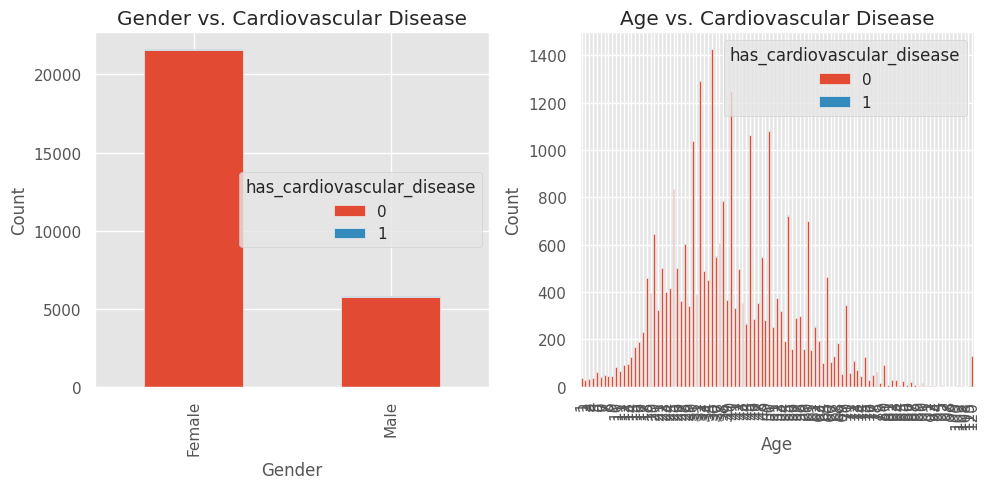

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'gender', 'age', and 'has_cardiovascular_disease'

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: Countplot for 'gender' and 'has_cardiovascular_disease'
ax1 = axes[0]
pd.crosstab(df['gender'], df['has_cardiovascular_disease']).plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Gender vs. Cardiovascular Disease')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')

# Plot 2: Countplot for 'age' and 'has_cardiovascular_disease'
ax2 = axes[1]
pd.crosstab(df['age'], df['has_cardiovascular_disease']).plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Age vs. Cardiovascular Disease')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()


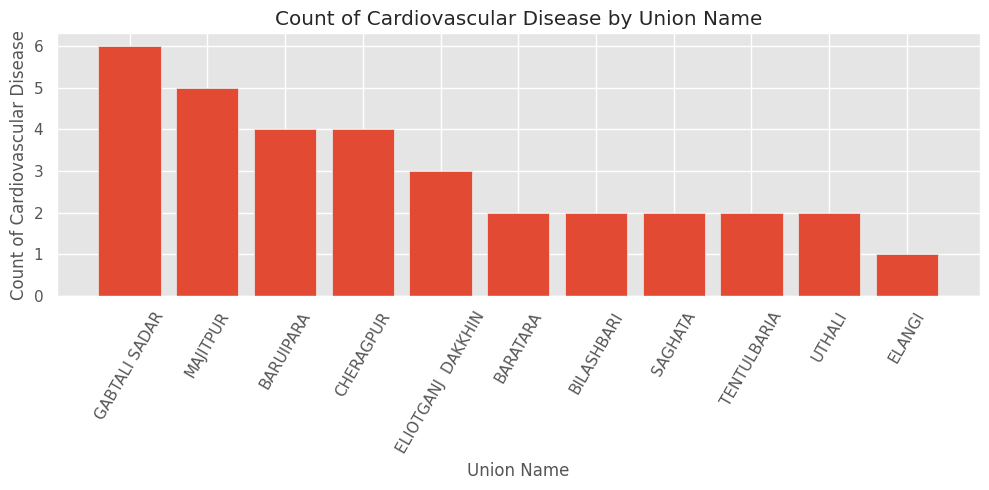

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'union_name' and 'has_cardiovascular_disease'

# Group the data by 'union_name' and calculate the count of individuals with cardiovascular disease for each group
grouped_data = df[df['has_cardiovascular_disease'] == 1].groupby('union_name')['has_cardiovascular_disease'].count()

# Sort the data by count values in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(sorted_data.index, sorted_data)
plt.xlabel('Union Name')
plt.ylabel('Count of Cardiovascular Disease')
plt.title('Count of Cardiovascular Disease by Union Name')
plt.xticks(rotation=60)
plt.tight_layout()

# Show the plot
plt.show()


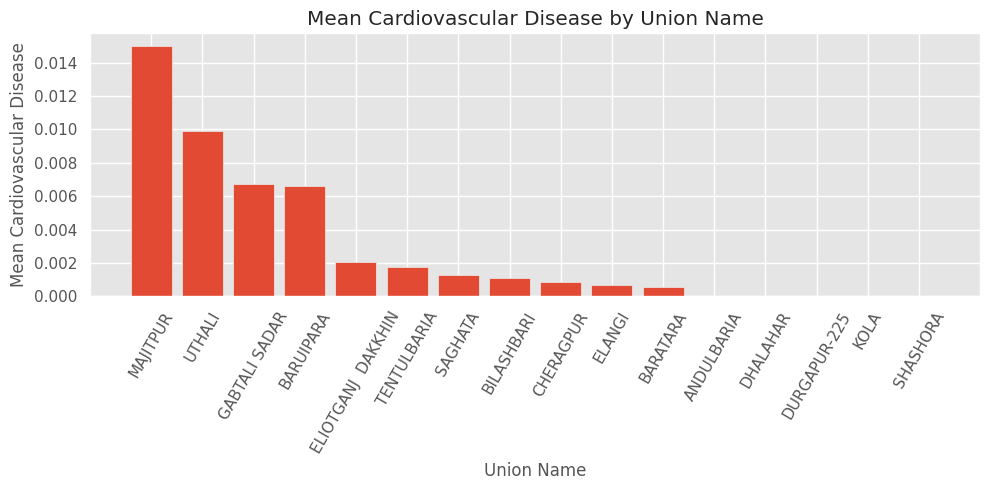

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'union_name' and 'has_cardiovascular_disease'

# Group the data by 'union_name' and calculate the mean of 'has_cardiovascular_disease' for each group
grouped_data = df.groupby('union_name')['has_cardiovascular_disease'].mean()

# Sort the data by mean values in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(sorted_data.index, sorted_data)
plt.xlabel('Union Name')
plt.ylabel('Mean Cardiovascular Disease')
plt.title('Mean Cardiovascular Disease by Union Name')
plt.xticks(rotation=60)
plt.tight_layout()

# Show the plot
plt.show()


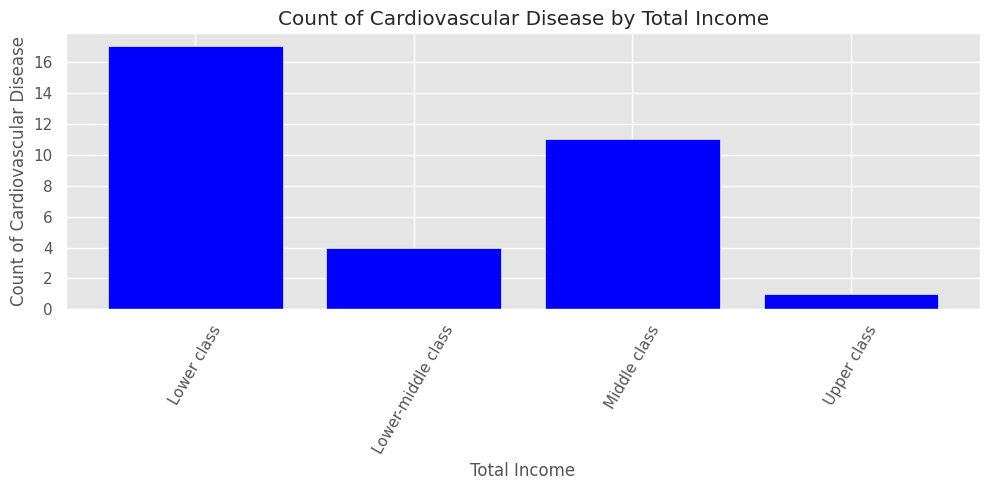

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'total_income' and 'has_cardiovascular_disease'

# Create a bar plot with different colors
plt.figure(figsize=(10, 5))

# Define color mapping for 'has_cardiovascular_disease'
color_mapping = {0: 'green', 1: 'blue'}

# Plot bars for each income category
for income, group in df.groupby('total_income'):
    plt.bar(income, group['has_cardiovascular_disease'].sum(), color=color_mapping[group['has_cardiovascular_disease'].max()])

plt.xlabel('Total Income')
plt.ylabel('Count of Cardiovascular Disease')
plt.title('Count of Cardiovascular Disease by Total Income')
plt.xticks(rotation=60)
plt.tight_layout()

# Show the plot
plt.show()


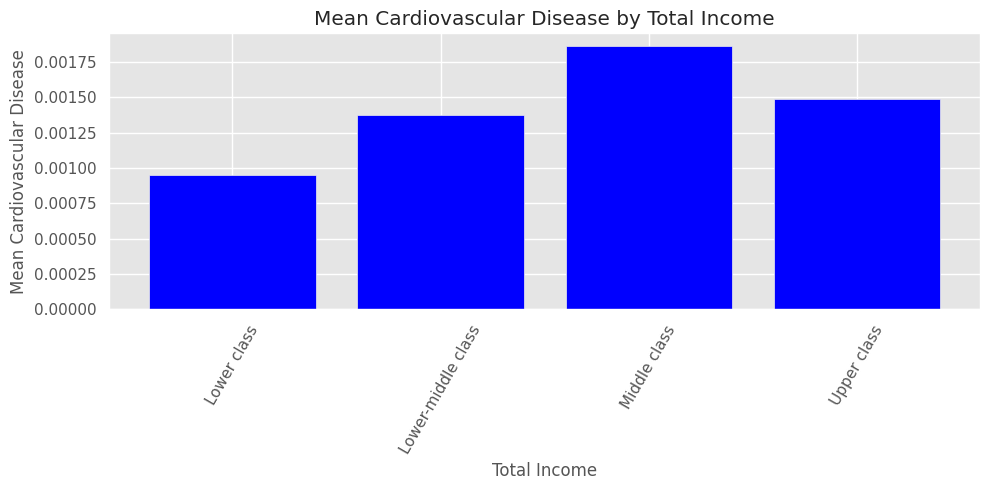

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'total_income' and 'has_cardiovascular_disease'

# Create a bar plot with different colors
plt.figure(figsize=(10, 5))

# Define color mapping for 'has_cardiovascular_disease'
color_mapping = {0: 'green', 1: 'blue'}

# Plot bars for each income category
for income, group in df.groupby('total_income'):
    plt.bar(income, group['has_cardiovascular_disease'].mean(), color=color_mapping[group['has_cardiovascular_disease'].max()])

plt.xlabel('Total Income')
plt.ylabel('Mean Cardiovascular Disease')
plt.title('Mean Cardiovascular Disease by Total Income')
plt.xticks(rotation=60)
plt.tight_layout()

# Show the plot
plt.show()


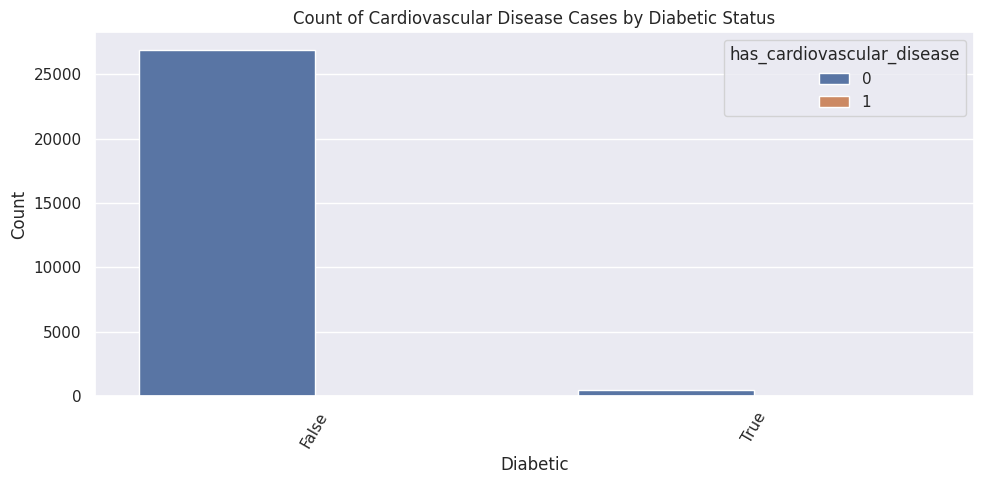

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'diabetic' and 'has_cardiovascular_disease'

# Set the theme and create a countplot with hue
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='diabetic', hue='has_cardiovascular_disease')

plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.title('Count of Cardiovascular Disease Cases by Diabetic Status')
plt.xticks(rotation=60)
plt.tight_layout()

# Show the plot
plt.show()


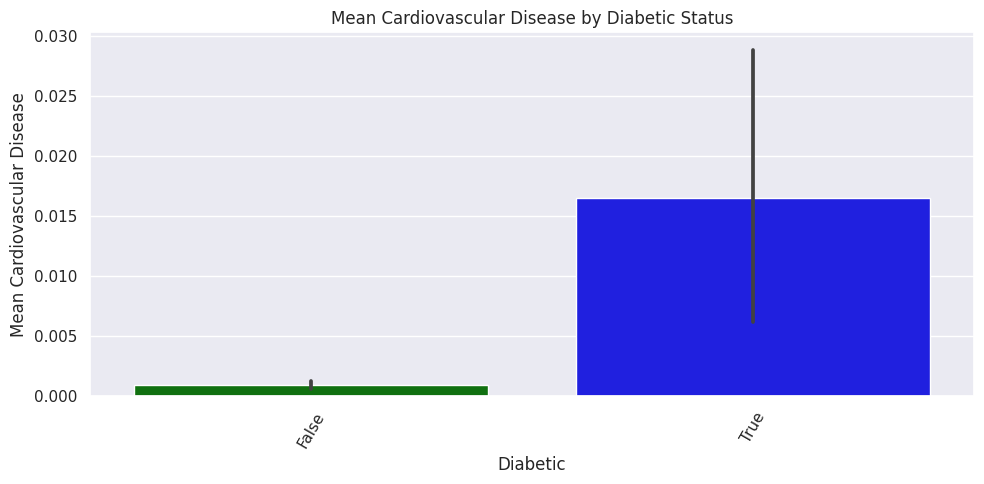

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'diabetic' and 'has_cardiovascular_disease'

# Set a custom color palette
custom_palette = {0: 'green', 1: 'blue'}

# Create a bar plot with custom colors
plt.figure(figsize=(10, 5))
sns.set_theme()
sns.barplot(data=df, x='diabetic', y='has_cardiovascular_disease', palette=custom_palette)

plt.xlabel('Diabetic')
plt.ylabel('Mean Cardiovascular Disease')
plt.title('Mean Cardiovascular Disease by Diabetic Status')
plt.xticks(rotation=60)
plt.tight_layout()

# Show the plot
plt.show()


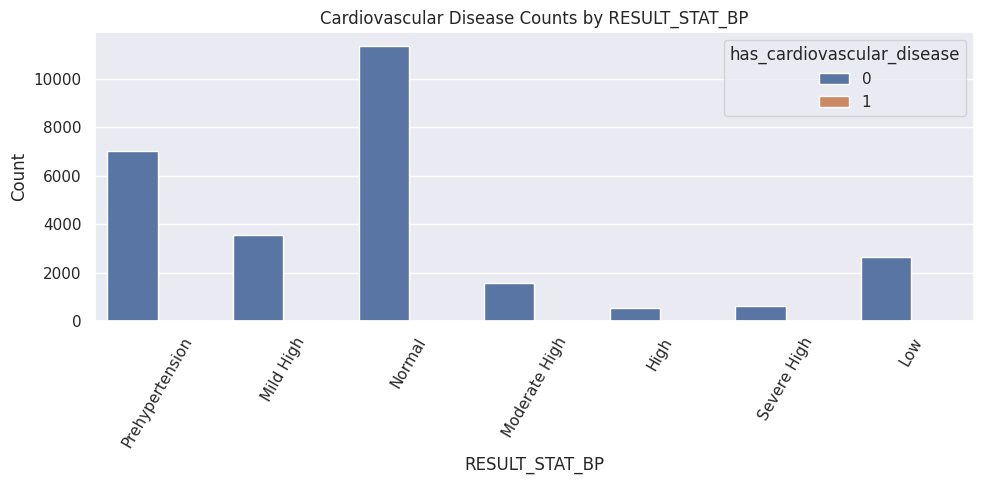

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'RESULT_STAT_BP' and 'has_cardiovascular_disease'

# Set the theme and create a countplot with different colors for 'has_cardiovascular_disease'
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='RESULT_STAT_BP', hue='has_cardiovascular_disease')

plt.xlabel('RESULT_STAT_BP')
plt.ylabel('Count')
plt.title('Cardiovascular Disease Counts by RESULT_STAT_BP')
plt.xticks(rotation=60)
plt.tight_layout()

# Show the plot
plt.show()


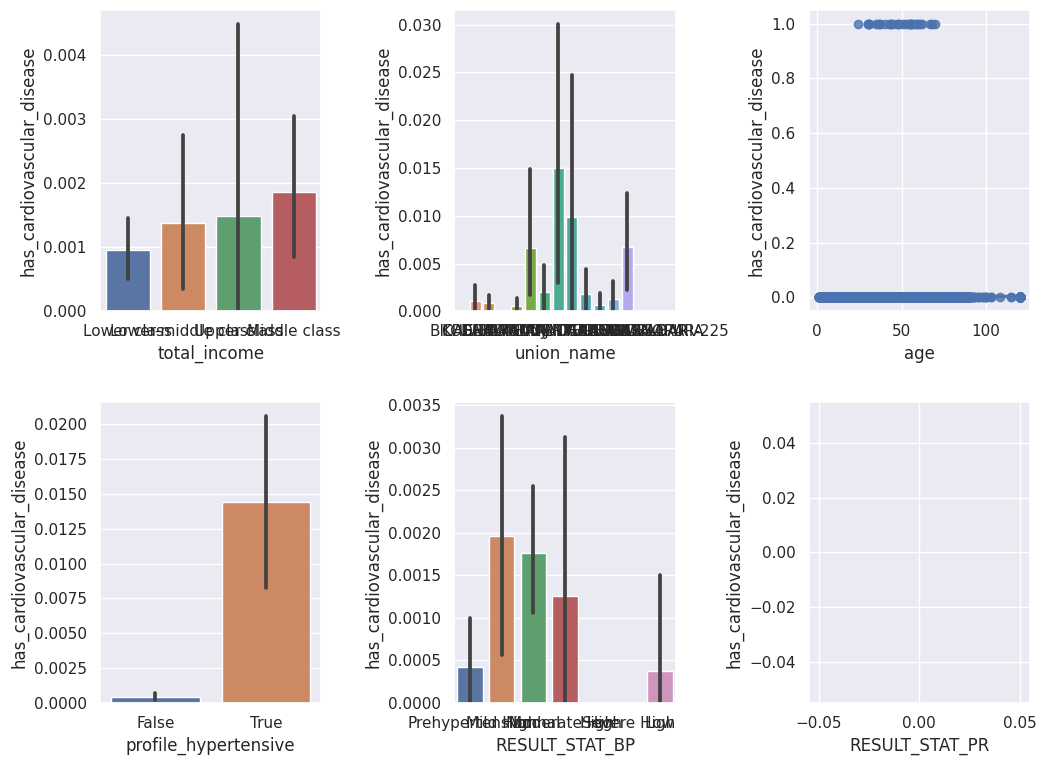

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the relevant columns

# Set the theme and create subplots
sns.set_theme()
fig, axes = plt.subplots(2, 3, figsize=(12, 9))
plt.subplots_adjust(hspace=0.3, wspace=0.6)
df['RESULT_STAT_PR'] = pd.to_numeric(df['RESULT_STAT_PR'], errors='coerce')


# Create various plots in the subplots
sns.barplot(data=df, x='total_income', y='has_cardiovascular_disease', ax=axes[0, 0])
sns.barplot(data=df, x='union_name', y='has_cardiovascular_disease', ax=axes[0, 1])
sns.regplot(data=df, x='age', y='has_cardiovascular_disease', ax=axes[0, 2])
sns.barplot(data=df, x='profile_hypertensive', y='has_cardiovascular_disease', ax=axes[1, 0])
sns.barplot(data=df, x='RESULT_STAT_BP', y='has_cardiovascular_disease', ax=axes[1, 1])
sns.regplot(data=df, x='RESULT_STAT_PR', y='has_cardiovascular_disease', ax=axes[1, 2])

# Show the plots
plt.show()


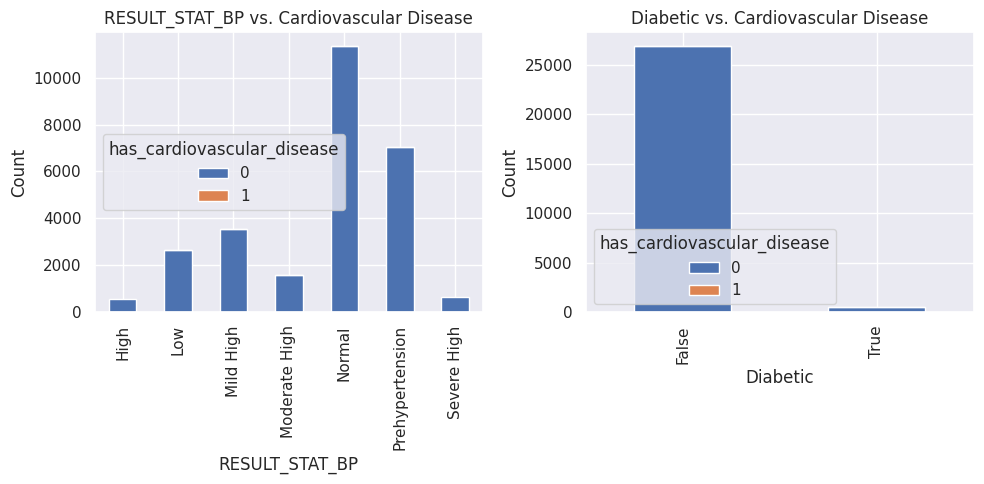

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'RESULT_STAT_BP', 'diabetic', and 'has_cardiovascular_disease'

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: Countplot for 'RESULT_STAT_BP' and 'has_cardiovascular_disease'
ax1 = axes[0]
pd.crosstab(df['RESULT_STAT_BP'], df['has_cardiovascular_disease']).plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('RESULT_STAT_BP vs. Cardiovascular Disease')
ax1.set_xlabel('RESULT_STAT_BP')
ax1.set_ylabel('Count')

# Plot 2: Countplot for 'diabetic' and 'has_cardiovascular_disease'
ax2 = axes[1]
pd.crosstab(df['diabetic'], df['has_cardiovascular_disease']).plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Diabetic vs. Cardiovascular Disease')
ax2.set_xlabel('Diabetic')
ax2.set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Check if there are any people with 'high' BP who do not have cardiovascular disease
high_bp_no_cardio = df[(df['RESULT_STAT_BP'] == 'HIGH') & (df['has_cardiovascular_disease'] == 0)]

if high_bp_no_cardio.empty:
    print("All people with 'high' BP have cardiovascular disease.")
else:
    print("There are people with 'high' BP who do not have cardiovascular disease.")


All people with 'high' BP have cardiovascular disease.


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns 'diabetic' and 'has_cardiovascular_disease'

# Filter the DataFrame for people with diabetes and cardiovascular disease
diabetic_and_cvd = df[(df['diabetic'] == 1) & (df['has_cardiovascular_disease'] == 1)]

# Calculate the number of people with both conditions
count = len(diabetic_and_cvd)

print(f'Number of people with both diabetes and cardiovascular disease: {count}')


Number of people with both diabetes and cardiovascular disease: 8


In [ ]:
!pip install matplotlib-venn



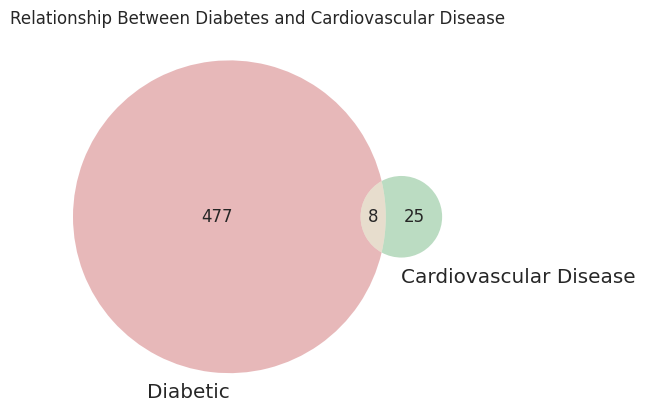

In [ ]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'diabetic' and 'has_cardiovascular_disease'

# Filter the DataFrame for people with diabetes and cardiovascular disease
diabetic_and_cvd = df[(df['diabetic'] == 1) & (df['has_cardiovascular_disease'] == 1)]

# Calculate the number of people with both conditions
count = len(diabetic_and_cvd)

# Calculate the number of people with only diabetes
diabetic_only = len(df[(df['diabetic'] == 1) & (df['has_cardiovascular_disease'] == 0)])

# Calculate the number of people with only cardiovascular disease
cvd_only = len(df[(df['diabetic'] == 0) & (df['has_cardiovascular_disease'] == 1)])

# Create a Venn diagram
venn2(subsets=(diabetic_only, cvd_only, count), set_labels=('Diabetic', 'Cardiovascular Disease'))

# Display the plot
plt.title('Relationship Between Diabetes and Cardiovascular Disease')
plt.show()

In [ ]:
df.columns


Index(['RESULT_STAT_BP', 'has_cardiovascular_disease'], dtype='object')

In [ ]:
# Filter the DataFrame for people with both diabetes and cardiovascular disease
diabetic_and_cvd = df[(df['diabetic'] == 1) & (df['has_cardiovascular_disease'] == 1)]

# Calculate the number of people with both conditions
count = len(diabetic_and_cvd)

print(f'Number of people with both diabetes and cardiovascular disease: {count}')


Number of people with both diabetes and cardiovascular disease: 8


In [ ]:
#Initialize ChiSquare Class
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns 'RESULT_STAT_BP' and 'has_cardiovascular_disease'

# Define the columns to test
colX = 'RESULT_STAT_BP'
colY = 'has_cardiovascular_disease'

# Extract and convert the columns to strings
X = df[colX].astype(str)
Y = df[colY].astype(str)

# Calculate the observed frequencies using crosstab
dfObserved = pd.crosstab(Y, X)

# Display the observed frequencies
print(dfObserved)


RESULT_STAT_BP              High   Low  Mild High  Moderate High  Normal  \
has_cardiovascular_disease                                                 
0                            542  2666       3553           1596   11349   
1                              0     1          7              2      20   

RESULT_STAT_BP              Prehypertension  Severe High  
has_cardiovascular_disease                                
0                                      7036          629  
1                                         3            0  


In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
from decimal import Decimal
chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)

In [ ]:
dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
dfExpected

RESULT_STAT_BP,High,Low,Mild High,Moderate High,Normal,Prehypertension,Severe High
has_cardiovascular_disease,,,,,,,
0,541.347322,2663.788389,3555.713035,1596.075682,11355.309407,7030.52361,628.242556
1,0.652678,3.211611,4.286965,1.924318,13.690593,8.47639,0.757444


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named 'df' with columns 'RESULT_STAT_BP' and 'has_cardiovascular_disease'

# Create a contingency table
contingency_table = pd.crosstab(df['RESULT_STAT_BP'], df['has_cardiovascular_disease'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies table:')
print(expected)


Chi-square statistic: 11.112322758165917
P-value: 0.08496637968112597
Degrees of freedom: 6
Expected frequencies table:
[[5.41347322e+02 6.52678441e-01]
 [2.66378839e+03 3.21161144e+00]
 [3.55571303e+03 4.28696541e+00]
 [1.59607568e+03 1.92431762e+00]
 [1.13553094e+04 1.36905926e+01]
 [7.03052361e+03 8.47639031e+00]
 [6.28242556e+02 7.57444169e-01]]


In [ ]:
df.columns


Index(['RESULT_STAT_BP', 'has_cardiovascular_disease'], dtype='object')

In [ ]:
alpha=0.05 #Choose 95% confidence level

if p<alpha:
    result="{0} is IMPORTANT for Prediction".format(colX)
else:
    result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
print(result)

RESULT_STAT_BP is NOT an important predictor. (Discard RESULT_STAT_BP from model)


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named 'df' with columns and 'has_cardiovascular_disease'

# Create a list of columns to test
testColumns = ['total_income', 'union_name', 'age', 'gender', 'is_poor', 'disabilities_name', 'diabetic', 'profile_hypertensive', 'RESULT_STAT_BP', 'RESULT_STAT_PR', 'is_freedom_fighter', 'had_stroke']

alpha = 0.05  # Set the significance level

for colX in testColumns:
    X = df[colX].astype(str)
    Y = df['has_cardiovascular_disease'].astype(str)

    dfObserved = pd.crosstab(Y, X)
    chi2, p, dof, expected = chi2_contingency(dfObserved.values)

    result = ""
    if p < alpha:
        result = f"{colX} is IMPORTANT for Prediction"
    else:
        result = f"{colX} is NOT an important predictor. (Discard {colX} from the model)"

    print(result)


total_income is NOT an important predictor. (Discard total_income from the model)
union_name is IMPORTANT for Prediction
age is NOT an important predictor. (Discard age from the model)
gender is NOT an important predictor. (Discard gender from the model)
is_poor is NOT an important predictor. (Discard is_poor from the model)
disabilities_name is NOT an important predictor. (Discard disabilities_name from the model)
diabetic is IMPORTANT for Prediction
profile_hypertensive is IMPORTANT for Prediction
RESULT_STAT_BP is NOT an important predictor. (Discard RESULT_STAT_BP from the model)
RESULT_STAT_PR is NOT an important predictor. (Discard RESULT_STAT_PR from the model)
is_freedom_fighter is NOT an important predictor. (Discard is_freedom_fighter from the model)
had_stroke is IMPORTANT for Prediction


ANOVA

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming you have a DataFrame named 'df' with columns 'age' and 'has_cardiovascular_disease'

# Group 'age' by 'has_cardiovascular_disease' categories
groups = [group['age'] for name, group in df.groupby('has_cardiovascular_disease')]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

# Display ANOVA results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the results based on the p-value
if p_value < 0.05:
    print('There are statistically significant differences in age between groups.')
else:
    print('There are no statistically significant differences in age between groups.')


F-statistic: 7.875540363545595
P-value: 0.0050143243496452725
There are statistically significant differences in age between groups.


Fisher Exact Test

In [ ]:
import pandas as pd
from scipy.stats import fisher_exact

# Create a DataFrame with random data
data = {'RESULT_STAT_BP': ['High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low'],
        'has_cardiovascular_disease': [1, 0, 1, 0, 1, 1, 0, 0]}

df = pd.DataFrame(data)

# Create a 2x2 contingency table
contingency_table = pd.crosstab(df['RESULT_STAT_BP'], df['has_cardiovascular_disease'])

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)

# Display the results
print(f'Odds Ratio: {odds_ratio}')
print(f'P-value: {p_value}')


Odds Ratio: 0.1111111111111111
P-value: 0.48571428571428565


T-Test

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming you have a DataFrame named 'df' with columns 'age', 'RESULT_STAT_BP', and 'has_cardiovascular_disease'

# Define the two groups for comparison (0: No cardiovascular disease, 1: Cardiovascular disease)
group0 = df[df['has_cardiovascular_disease'] == 0]['age']  # Change 'age' to the variable you want to test
group1 = df[df['has_cardiovascular_disease'] == 1]['age']  # Change 'age' to the variable you want to test

# Perform an independent t-test
t_statistic, p_value = ttest_ind(group0, group1)

# Display t-test results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results based on the p-value
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print('There are statistically significant differences in means between the two groups.')
else:
    print('There are no statistically significant differences in means between the two groups.')


T-statistic: -2.8063393172504285
P-value: 0.005014324349690641
There are statistically significant differences in means between the two groups.


Decision tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,confusion_matrix

# Assuming you have a DataFrame named 'df' with columns and 'has_cardiovascular_disease'

# Create a list of columns to use as predictors
predictor_columns = ['total_income', 'union_name', 'age', 'gender', 'is_poor', 'disabilities_name', 'diabetic', 'profile_hypertensive', 'RESULT_STAT_BP', 'RESULT_STAT_PR', 'is_freedom_fighter', 'had_stroke']

X = df[predictor_columns]
y = df['has_cardiovascular_disease']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Use SimpleImputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5479
           1       0.00      0.00      0.00         2

    accuracy                           1.00      5481
   macro avg       0.50      0.50      0.50      5481
weighted avg       1.00      1.00      1.00      5481

Confusion Matrix:
[[5469   10]
 [   2    0]]
